<a href="https://colab.research.google.com/github/kendor74/Crop-Recommendation/blob/main/ObjectDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [ ]:
!pip install torch torchvision torchaudio
!pip install opencv-python
!pip install numpy


In [ ]:
import torch

# Load YOLOv5 model (can replace with YOLOv7 or other versions as needed)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # Change to 'yolov5m' or 'yolov5l' for larger models



# Get class names
class_names = model.names  # This is a list of class names
class_names


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-9-20 Python-3.10.12 torch-2.4.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [ ]:
# Dictionary mapping Arabic words to YOLO class IDs
arabic_to_id = {
    "شخص": 0,         # Person
    "دراجة": 1,       # Bicycle
    "سيارة": 2,       # Car
    "دراجة نارية": 3, # Motorcycle
    "طائرة": 4,       # Airplane
    "حافلة": 5,       # Bus
    "قطار": 6,        # Train
    "شاحنة": 7,      # Truck
    "قارب": 8,        # Boat
    "إشارة مرور": 9,  # Traffic Light
    "حنفية": 10,     # Fire Hydrant
    "علامة توقف": 11, # Stop Sign
    "عداد": 12,      # Parking Meter
    "مقعد": 13,      # Bench
    "عصفور": 14,     # Bird
    "قطه": 15,       # Cat
    "كلب": 16,       # Dog
    "حصان": 17,      # Horse
    "خروف": 18,      # Sheep
    "بقرة": 19,      # Cow
    "فيل": 20,       # Elephant
    "دب": 21,        # Bear
    "حمار وحشي": 22, # Zebra
    "زرافة": 23,     # Giraffe
    "حقيبة ظهر": 24, # Backpack
    "مظلة": 25,      # Umbrella
    "حقيبة يد": 26,  # Handbag
    "رباط عنق": 27,  # Tie
    "حقيبة سفر": 28, # Suitcase
    "فريسبي": 29,    # Frisbee
    "زلاجات": 30,    # Skis
    "لوح تزلج": 31,  # Snowboard
    "كرة رياضية": 32, # Sports Ball
    "طائرة ورقية": 33, # Kite
    "مضرب بيسبول": 34, # Baseball Bat
    "قفاز بيسبول": 35, # Baseball Glove
    "لوح تزلج": 36,  # Skateboard
    "لوح ركوب الأمواج": 37, # Surfboard
    "مضرب تنس": 38,  # Tennis Racket
    "زجاجة": 39,     # Bottle
    "كأس": 40,       # Wine Glass
    "فنجان": 41,     # Cup
    "شوكة": 42,      # Fork
    "سكين": 43,      # Knife
    "ملعقة": 44,     # Spoon
    "وعاء": 45,      # Bowl
    "موز": 46,       # Banana
    "تفاح": 47,      # Apple
    "ساندويتش": 48,  # Sandwich
    "برتقال": 49,    # Orange
    "بروكلي": 50,    # Broccoli
    "جزر": 51,       # Carrot
    "هوت دوغ": 52,   # Hot Dog
    "بيتزا": 53,     # Pizza
    "دونات": 54,     # Donut
    "كعكة": 55,      # Cake
    "كرسي": 56,      # Chair
    "أريكة": 57,     # Couch
    "نبتة في أصيص": 58, # Potted Plant
    "سرير": 59,      # Bed
    "طاولة طعام": 60, # Dining Table
    "مرحاض": 61,     # Toilet
    "تلفاز": 62,     # TV
    "حاسوب محمول": 63, # Laptop
    "فأرة": 64,      # Mouse
    "تحكم عن بعد": 65, # Remote
    "لوحة مفاتيح": 66, # Keyboard
    "هاتف محمول": 67, # Cell Phone
    "ميكروويف": 68,  # Microwave
    "فرن": 69,       # Oven
    "محماصة": 70,    # Toaster
    "حوض": 71,       # Sink
    "ثلاجة": 72,     # Refrigerator
    "كتاب": 73,      # Book
    "ساعة": 74,      # Clock
    "مزهرية": 75,    # Vase
    "مقص": 76,       # Scissors
    "دب محشو": 77,   # Teddy Bear
    "مجفف شعر": 78,  # Hair Drier
    "فرشاة أسنان": 79 # Toothbrush
}


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


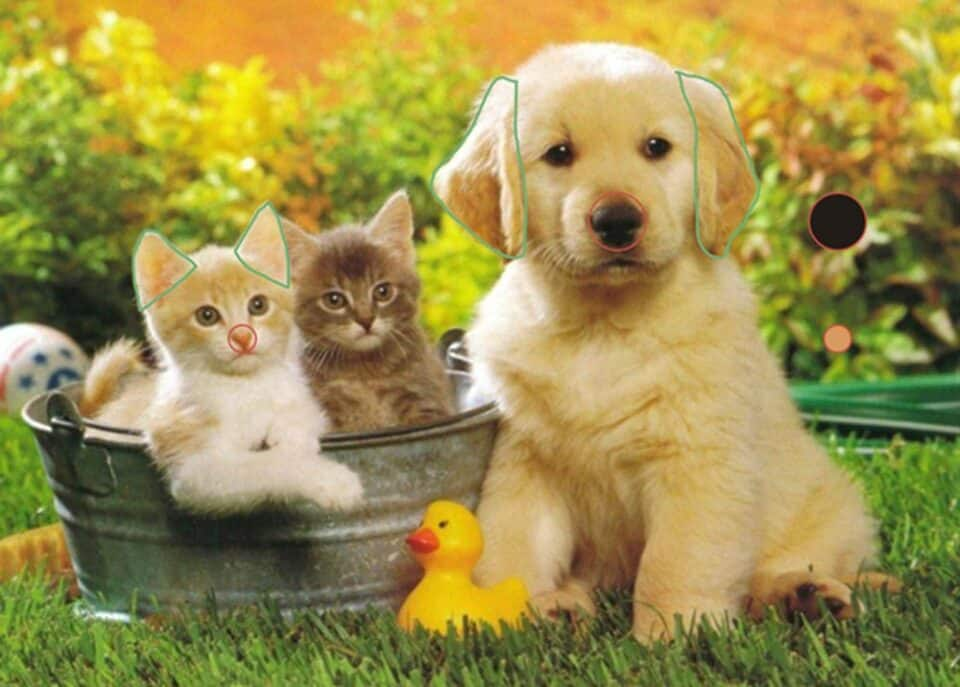

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


def detect_objects(image_path, arabic_text):
    # Load image
    img = cv2.imread(image_path)

    # Perform detection
    results = model(img)

    # Convert results to a Pandas DataFrame
    df = results.pandas().xyxy[0]  # Get results as a DataFrame

    # Parse Arabic text and get the corresponding object IDs
    object_ids = []
    for word in arabic_text.split():
        if word in arabic_to_id:
            object_ids.append(arabic_to_id[word])

    # Draw bounding boxes for specified objects
    for _, row in df.iterrows():
        if int(row['class']) in object_ids:
            x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Draw box
            cv2.putText(img, row['name'], (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Display image
    cv2_imshow(img)

# Example usage
detect_objects("/content/image_with_a_cat.jpg", "جيب  شخص في الصوره")
